# Assignment 1
## Name: Rahul Purohit
## Student ID: 20701161

In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
from sympy.solvers import solve,linsolve;
from sympy import Symbol;
import pulp as lpp;

In [2]:
# Methods to get the y from the x value

def yInTermsOfx_c3(X):
  return (-(cons3[0])*X + (cons3[2]))/(cons3[1]);
def yInTermsOfx_c2(X):
  return (-(cons2[0])*X + (cons2[2]))/(cons2[1]);
def yInTermsOfx_c1(X):
  return (-(cons1[0])*X + (cons1[2]))/(cons1[1]);

# Methods to get the x from the y value

def xInTermsOfy_c3(Y):
  return (-(cons3[1])*Y + (cons3[2]))/(cons3[0]);
def xInTermsOfy_c2(Y):
  return (-(cons2[1])*Y + (cons2[2]))/(cons2[0]);
def xInTermsOfy_c1(Y):
  return (-(cons1[1])*Y + (cons1[2]))/(cons1[0]);

def ObjectiveFunction(X,Y):
  return (objZ[0])*X + (objZ[1])*Y;

In [3]:
# finding the extreme and corner points
def ExtremeCorner():
    global x_max;
    global y_max;

    Symb_x = Symbol('x');    
    x_inter=[-1 for i in range(10)]; 
    y_inter=[-1 for i in range(10)];

    x_inter[9]=0;
    y_inter[9]=0;
        
    pseudores = solve(yInTermsOfx_c1(Symb_x) - yInTermsOfx_c2(Symb_x));
    if len(pseudores) > 0:
        x_inter[0] = pseudores[0];
        y_inter[0] = yInTermsOfx_c1(x_inter[0]);
    pseudores = solve(yInTermsOfx_c1(Symb_x) - yInTermsOfx_c3(Symb_x));
    if len(pseudores) > 0:
        x_inter[1] = pseudores[0];
        y_inter[1] = yInTermsOfx_c1(x_inter[1]);
    pseudores = solve(yInTermsOfx_c3(Symb_x) - yInTermsOfx_c2(Symb_x));
    if len(pseudores) > 0:
        x_inter[2] = pseudores[0];
        y_inter[2] = yInTermsOfx_c3(x_inter[2]);
    if cons1[1] != 0:
        x_inter[3] = 0;
        y_inter[3] = yInTermsOfx_c1(0);
    if cons2[1] != 0:
        x_inter[4] = 0;
        y_inter[4] = yInTermsOfx_c2(0);
    if cons3[1] != 0:
        x_inter[5] = 0;
        y_inter[5] = yInTermsOfx_c3(0);
    if cons1[0] != 0:
        y_inter[6] = 0;
        x_inter[6] = xInTermsOfy_c1(0);
    if cons2[0] != 0:
        y_inter[7] = 0;
        x_inter[7] = xInTermsOfy_c2(0);
    if cons3[0] != 0:
        y_inter[8] = 0;
        x_inter[8] = xInTermsOfy_c3(0);

    #plotting the extreme points
    if RegionNeeded=='Minimize':
        returnn=float('inf');
        for i in range(10):
            first = (op1_log=='leq' and (cons1[1])!=0 and y_inter[i] > float(yInTermsOfx_c1(x_inter[i])));
            second = (op1_log=='geq' and (cons1[1])!=0 and y_inter[i] < float(yInTermsOfx_c1(x_inter[i])));
            third = (op2_log=='leq' and (cons2[1])!=0 and y_inter[i] > float(yInTermsOfx_c2(x_inter[i])));
            fourth= (op2_log=='geq' and (cons2[1])!=0 and y_inter[i] < float(yInTermsOfx_c2(x_inter[i])));
            fifth = (op3_log=='leq' and (cons3[1])!=0 and y_inter[i] > float(yInTermsOfx_c3(x_inter[i])));
            sixth = (op3_log=='geq' and (cons3[1])!=0 and y_inter[i] < float(yInTermsOfx_c3(x_inter[i])));
            if x_inter[i]<0 or y_inter[i]<0 or first or second or third or fourth or fifth or sixth:
                continue;
            print('Extreme point is given as (',x_inter[i] ,',',y_inter[i],') andf has the Value:',ObjectiveFunction(x_inter[i],y_inter[i]));
            x_max = np.maximum(x_max,x_inter[i]);
            y_max = np.maximum(y_max,y_inter[i]);
            plt.plot(x_inter[i],y_inter[i],'go');
            returnn=np.minimum(returnn,ObjectiveFunction(x_inter[i],y_inter[i]));
    else:
        returnn=float('-inf');
        for i in range(10):
            first = (op1_log=='leq' and (cons1[1])!=0 and y_inter[i] > float(yInTermsOfx_c1(x_inter[i])));
            second = (op1_log=='geq' and (cons1[1])!=0 and y_inter[i] < float(yInTermsOfx_c1(x_inter[i])));
            third = (op2_log=='leq' and (cons2[1])!=0 and y_inter[i] > float(yInTermsOfx_c2(x_inter[i])));
            fourth = (op2_log=='geq' and (cons2[1])!=0 and y_inter[i] < float(yInTermsOfx_c2(x_inter[i])));
            fifth = (op3_log=='leq' and (cons3[1])!=0 and y_inter[i] > float(yInTermsOfx_c3(x_inter[i])));
            sixth = (op3_log=='geq' and (cons3[1])!=0 and y_inter[i] < float(yInTermsOfx_c3(x_inter[i])));
            if x_inter[i]<0 or y_inter[i]<0 or first or second or third or fourth or fifth or sixth:
                continue;

            print('Extreme point is given as (',x_inter[i] ,',',y_inter[i],') and has the Value:',ObjectiveFunction(x_inter[i],y_inter[i]));
            x_max = np.maximum(x_max,x_inter[i]);
            y_max = np.maximum(y_max,y_inter[i]);
            plt.plot(x_inter[i],y_inter[i],'go');
            returnn=np.maximum(returnn,ObjectiveFunction(x_inter[i],y_inter[i]));  
    return returnn;

In [4]:
# Finding the solution region
def lpp_unsolve(optimization_func,conss,isMinimization):    
    strr = "";
    if isMinimization==True:
        strr="Minimum";
        constrain_lp = lpp.LpProblem('Problem', lpp.LpMinimize);  
    else:
        strr="Maximum";
        constrain_lp = lpp.LpProblem('Problem', lpp.LpMaximize); 
    constrain_lp += optimization_func;
    for i in range(3):
        constrain_lp +=conss[i];
    task = constrain_lp.solve()
    if (task!=-1 and task!=-2):
        if op1_log=='geq' and op2_log=='geq' and op3_log=='geq' and isMinimization==True:
            print('The region which is unbounded');
            res=ExtremeCorner();
            print('the value of optimized function can be stated according to extreme points is given as ',res);
        else:
            print('Bounded '+strr+' area');
            res=ExtremeCorner();
            print('Unique '+ strr+ ' solution');
            print(strr + ' Solution :x=',lpp.value(x),' , y= ', lpp.value(y),', value = ',lpp.value(constrain_lp.objective));
    elif (task==-1):
        print('Infeasible Region');
        print('Solution does not exist');
    elif (task==-2):
        print('Unbounded Region');
        res=ExtremeCorner();
        print('No unique solution');
    return task;

In [5]:
def LppDefined():    
    c1_t=0
    c2_t=0
    c3_t=0
    if op1_log=='leq':
        c1_t = cons1[0]*x + cons1[1]*y <= cons1[2]
    else:
        c1_t = cons1[0]*x + cons1[1]*y >= cons1[2]
    if op2_log=='leq':
        c2_t = cons2[0]*x + cons2[1]*y <= cons2[2]
    else:
        c2_t = cons2[0]*x + cons2[1]*y >= cons2[2]

    if op3_log=='leq':
        c3_t = cons3[0]*x + cons3[1]*y <= cons3[2]
    else:
        c3_t = cons3[0]*x + cons3[1]*y >= cons3[2]
    optimization_func = objZ[0]*x + objZ[1]*y;
    conss_lpp=[c1_t, c2_t, c3_t];
    return lpp_unsolve(optimization_func,conss_lpp,(RegionNeeded=='Minimize'))

Minimize
20 10
1 2 40 leq
3 1 30 geq
4 3 60 geq
Bounded Minimum area
Extreme point is given as ( 4.00000000000000 , 18.0000000000000 ) andf has the Value: 260.000000000000
Extreme point is given as ( 6.00000000000000 , 12.0000000000000 ) andf has the Value: 240.000000000000
Extreme point is given as ( 40.0 , 0 ) andf has the Value: 800.0
Extreme point is given as ( 15.0 , 0 ) andf has the Value: 300.0
Unique Minimum solution
Minimum Solution :x= 6.0  , y=  12.0 , value =  240.0


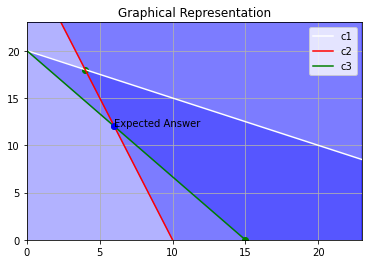

In [6]:
# Starting of the main Program
RegionNeeded=input();
objZ=list(map(float,input().split()))

inp1 = input().split();
inp2 = input().split();
inp3 = input().split();

op1_log = inp1[3]
op2_log = inp2[3]
op3_log = inp3[3]

cons1 = list(map(float,inp1[:3]))
cons2 = list(map(float,inp2[:3]))
cons3 = list(map(float,inp3[:3]))

# Create a variable x >= 0
x = lpp.LpVariable("x", lowBound = 0)   

# Create a variable y >= 0 
y = lpp.LpVariable("y", lowBound = 0)    
x_max = 0
y_max = 0

final_task=LppDefined();
limiting = int(y_max)+5;
if op3_log=='leq':
    c3=-limiting
else:
    c3=limiting
if op1_log=='leq':
    c1=-limiting
else:
    c1=limiting
if op2_log=='leq':
    c2=-limiting
else:
    c2=limiting
x_right = np.linspace(0,limiting,1000);
if (cons1[2]==0):
    y_right = xInTermsOfy_c1(x_right)
    plt.plot(y_right,x_right,color='w',label='c1');
    if a[3]=='leq':
        plt.fill_between(x_right,-limiting,limiting,where=(x_right<y_right),color='b',alpha=0.3)
    else:
        plt.fill_between(x_right,-limiting,limiting,where=(x_right>y_right),color='b',alpha=0.3)
else:
    y_right = yInTermsOfx_c1(x_right)
    plt.plot(x_right,y_right,color='w',label='c1');
    plt.fill_between(x_right,c1,y_right,color='b',alpha=0.3)
      
if (cons2[2]==0):
    y_rightt=xInTermsOfy_c2(x_right)
    plt.plot(y_rightt,x_right,color='r',label='c2');
    if b[3]=='leq':
        plt.fill_between(x_right,-limiting,limiting,where=(x_right<y_rightt),color='b',alpha=0.3)
    else:
        plt.fill_between(x_right,-limiting,limiting,where=(x_right>y_rightt),color='b',alpha=0.3)
else:
    y_rightt = yInTermsOfx_c2(x_right)
    plt.plot(x_right,y_rightt,color='r',label='c2');
    plt.fill_between(x_right,c2,y_rightt,color='b',alpha=0.3)
        
if (cons3[2]==0):
    y_righttt=xInTermsOfy_c3(x_right)
    plt.plot(y_righttt,x_right,color='g',label='c3');
    if c[3]=='leq':
      plt.fill_between(x_right,-limiting,limiting,where=(x_right<y_righttt),color='b',alpha=0.3)
    else:
      plt.fill_between(x_right,-limiting,limiting,where=(x_right>y_righttt),color='b',alpha=0.3)
else:
    y_righttt = yInTermsOfx_c3(x_right)
    plt.plot(x_right,y_righttt,color='g',label='c3');
    plt.fill_between(x_right,c3,y_righttt,color='b',alpha=0.3)
plt.legend()
plt.grid()
if final_task!=-1 and final_task!=-2:
  ans_x=lpp.value(x);
  ans_y=lpp.value(y);
  plt.plot(ans_x,ans_y,'bo',label='Final Answer')
  plt.text(ans_x,ans_y,'Expected Answer')
plt.title('Graphical Representation');
plt.xlim(0,limiting);
plt.ylim(0,limiting);
plt.show();